<a href="https://colab.research.google.com/github/Lnchi/CIP-Data-Science-Internship/blob/main/ExploratoryDataAnalysis_GooglePlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  In this work, I will perform Exploratory Data Analysis on the data of **Google Play Store** apps using Python.

# Import libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# Load the dataset:
# Web scraped data of 10k Play Store apps for analysing the Android market.

In [ ]:
#Install the Kaggle library. 
!pip install kaggle
#Create a new directory named ".kaggle".
!mkdir ~/.kaggle
#upload the “kaggle.json” file to Google Drive / "kaggle.json" contains the username and the API key
#copy the “kaggle.json” file from the mounted google drive to the current instance storage.
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json 
#Grant the necessary permissions for this file.
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download lava18/google-play-store-apps -f googleplaystore.csv 

googleplaystore.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip googleplaystore.csv.zip

Archive:  googleplaystore.csv.zip
replace googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: googleplaystore.csv     


In [ ]:
df = pd.read_csv("googleplaystore.csv")
#df.head()
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7857,CT Scan Viewer 3D,MEDICAL,4.2,6,29M,"1,000+",Free,0,Everyone,Medical,"June 20, 2018",1.0,2.3 and up
9601,World Series of Poker – WSOP Free Texas Holdem,GAME,4.5,910051,76M,"10,000,000+",Free,0,Teen,Card,"August 2, 2018",5.11.0,4.1 and up
9993,EW PDF,BOOKS_AND_REFERENCE,NaN,0,8.7M,5+,Free,0,Everyone,Books & Reference,"February 14, 2018",1.0.2,4.4 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4083,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
3513,CM FILE MANAGER HD,PRODUCTIVITY,4.3,144879,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"January 24, 2016",3.5.0,Varies with device
5414,Gravidez ao Vivo,MEDICAL,NaN,61,Varies with device,"1,000+",Paid,$2.99,Everyone,Medical,"March 11, 2014",1.5,2.2 and up
5754,AW CAMERA,TOOLS,NaN,2,24M,100+,Free,0,Everyone,Tools,"January 30, 2018",3.1.1,2.3 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
9746,Plastic Surgery Surgeon Simulator Er Doctor Games,FAMILY,3.7,3482,37M,"500,000+",Free,0,Everyone,Casual,"August 7, 2018",1.6,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Performing an exploratory data analysis on the Google Play Store dataset

- Exploring the data can reveal some interesting insights, so let's dive in.

# - Check the data for any missing values and clean the data.

In [ ]:
 df.isna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#count the NaN values (the missing value in the data) 
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#isna().sum() counts both NaN and None missing values, while isnull().sum() only counts NaN missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#Return boolean Series denoting duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [ ]:
# delete rows with missing values

df.dropna(inplace=True)
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# delete duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Inspect the data types of all columns
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#- Inspect the columns for any special characters, clean them, and then convert the columns to their appropriate data types.

In [ ]:
# Convert Reviews from 'object' to 'float'
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].unique()
df['Reviews'].dtypes

dtype('float64')

In [ ]:
# Clean the 'Installs' data and convert the data type from 'object' to 'float'.
# Check special characters
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
Installs=[]

for x in df.Installs: 
  if ',' in x:
    x = x.replace(',' ,'')
  if '+' in x:
    x = x.replace('+','')
  x=int(x)
  Installs.append(x)

In [ ]:
df['Installs']=Installs
df['Installs'] = df['Installs'].astype(float)
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 8886, dtype: float64

In [ ]:
# Examine the 'Price' data for any special characters, clean it, and then convert the data type from 'object' to 'float'.
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
df['Price']= pd.to_numeric(df['Price'].replace({'\$': '','Everyone':''}, regex=True)) 
df['Price'] = df['Price'].astype(float)

<ipython-input-67-4d3d24ddbcc7>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



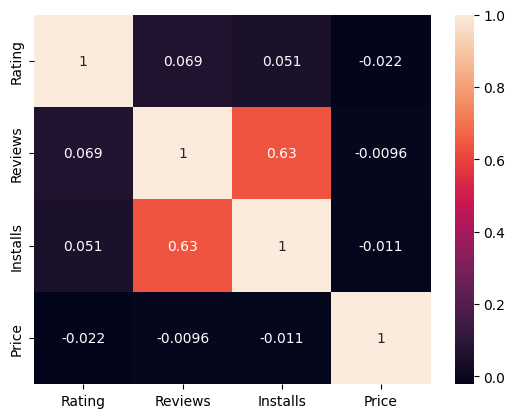

In [ ]:
# Check the correlation between columns
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

- Four numeric column in the Dataframe.
- The values on the diagonal are 1, this is because each column is perfectly correlated with itself.
- There’s a very weak positive correlation between Rating and Reviews/Installs.
- We get 0.63 as the correlation between Reviews and Installs. This indicates that the two columns correlated in a moderately positive direction.
- There is a weak negative correlation observed between the Price column and either the Rating or Installs column.
- The correlation coefficient of 0.0096 between the Price and Reviews columns indicates a very weak negative linear relationship.


In [ ]:
cat=df.Category.unique()
cat


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
len(cat)

33

# - There are 33 categories in the dataset. Let's find out which category is the most commonly occurring.

In [ ]:
topCat = df.groupby(by = ["Category"]).size().reset_index(name="Count")
topCat

,Category,Count
0,ART_AND_DESIGN,61
1,AUTO_AND_VEHICLES,73
2,BEAUTY,42
3,BOOKS_AND_REFERENCE,177
4,BUSINESS,270
5,COMICS,58
6,COMMUNICATION,307
7,DATING,159
8,EDUCATION,129
9,ENTERTAINMENT,111


In [ ]:
figure = px.bar(topCat,x='Category',y='Count',title='Categorization of Apps',height = 800)
figure.show()

# - The family category is the most frequently occurring

# Distribution of app ratings

We will explore the correlation between **ratings** and **categories** to gain insights.

In [ ]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
topRat = df['Rating'].value_counts()
topRat

4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [ ]:
figure = px.histogram(df, x="Rating", title='App Ratings Overview',text_auto='.3s', height=800)
figure.show()

# - Most of the ratings are concentrated around 4.

# Distribution of ratings within each category column.

In [ ]:
AverageRatperCat=df.groupby('Category')['Rating'].mean().reset_index(name='Average Rating')
AverageRatperCat

,Category,Average Rating
0,ART_AND_DESIGN,4.377049
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.347458
4,BUSINESS,4.102593
5,COMICS,4.155172
6,COMMUNICATION,4.151466
7,DATING,3.971698
8,EDUCATION,4.375969
9,ENTERTAINMENT,4.136036


In [ ]:
figure=px.bar(AverageRatperCat, x='Category', y='Average Rating', title='Mean score for each category', color='Category',
              text_auto='.3s', height=800)
figure.show()

# - Among all categories, "Event" has the highest average rating. However "Dating" category displays the lowest average rating.

# Distribution of reviews for each Category



Let's determine which category has the highest number of user reviews.

In [ ]:
df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [ ]:
RevPerCat=df.groupby('Category')['Reviews'].sum().reset_index(name='Total reviews')
RevPerCat

,Category,Total reviews
0,ART_AND_DESIGN,1.714317e+06
1,AUTO_AND_VEHICLES,1.163630e+06
2,BEAUTY,3.951330e+05
3,BOOKS_AND_REFERENCE,2.187282e+07
4,BUSINESS,1.235770e+07
5,COMICS,3.381945e+06
6,COMMUNICATION,6.012731e+08
7,DATING,5.545164e+06
8,EDUCATION,2.316472e+07
9,ENTERTAINMENT,4.757072e+07


In [ ]:
figure= px.line(RevPerCat, x='Category', y='Total reviews', markers=True, title='Distribution of total app reviews for each Category', height=800)
figure.show()

# - The Game category has the highest number of reviews.
# - The Event app, however, has a high rating but a relatively low number of reviews.

# Distribution of app installs on each category.

In [ ]:
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

In [ ]:
InsPerCat=df.groupby('Category')['Installs'].sum().reset_index(name='Total installs')

In [ ]:
figure=px.pie(InsPerCat, values='Total installs', names='Category',color_discrete_sequence=px.colors.sequential.Rainbow)
figure.update_layout(title_text='Distribution of total app installation for each Category',height = 800)
figure.update_traces(rotation=90,textposition='inside',textinfo='label+percent+value')

# - The most frequently installed category by users are Game, followed by Communication as the second most installed category, and Social as the third most installed category.

# Let's examine the Type column to determine if the app is free or paid.

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
typCat = df.groupby('Category')['Type'].value_counts().reset_index(name="Count")
typCat

,Category,Type,Count
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,156
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,68


In [ ]:
figure = px.bar(typCat, x="Category", y="Count", color='Type', barmode='group', height=900)
figure.show()

# - Once again, the family category has the highest number of both free and paid apps on the Google Play Store.
# - Shopping apps, social apps, entertainment apps, art and design apps, events apps, education apps, comics apps and others are mostly free.

# App Price vs Rating
- Examining the Correlation between App Price and Rating

In [ ]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [ ]:
figure = px.scatter(df, x='Price', y='Rating', color="Price", title='App Price vs Rating')
figure.show()

- The majority of apps are priced below $15.